In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('zillow_rent_cleaned.csv')

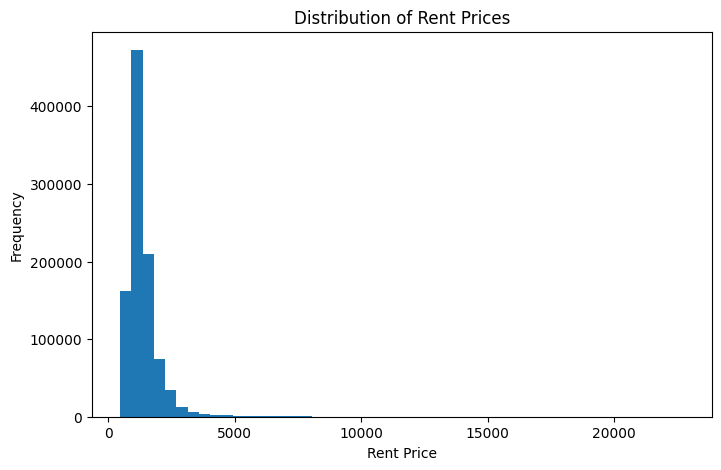

In [3]:
plt.figure(figsize=(8,5))
plt.hist(df['RentPrice'], bins=50)
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent Price')
plt.ylabel('Frequency')
plt.show()

In [4]:
df[['RentPrice', 'Population Rank']].describe()

,RentPrice,Population Rank
count,984825.00000,984825.000000
mean,1375.08437,6566.000000
std,706.04595,3790.595106
min,470.00000,1.000000
25%,992.00000,3283.000000
50%,1222.00000,6566.000000
75%,1518.00000,9849.000000
max,22744.00000,13131.000000


In [5]:
#Pearson coefficient

corr = df[['RentPrice', 'Population Rank']].corr(method='pearson')
corr

,RentPrice,Population Rank
RentPrice,1.000000,-0.142299
Population Rank,-0.142299,1.000000


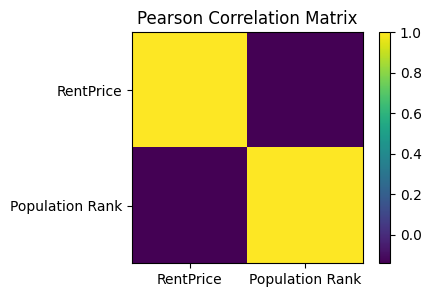

In [6]:
plt.figure(figsize=(4,3))
plt.imshow(corr)
plt.colorbar()
plt.xticks([0,1], corr.columns)
plt.yticks([0,1], corr.columns)
plt.title('Pearson Correlation Matrix')
plt.show()

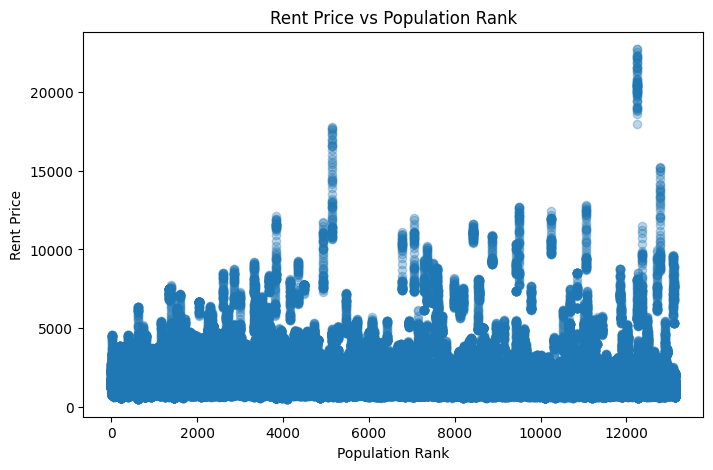

In [7]:
# Scatter Plot

plt.figure(figsize=(8,5))
plt.scatter(df['Population Rank'], df['RentPrice'], alpha=0.3)
plt.xlabel('Population Rank')
plt.ylabel('Rent Price')
plt.title('Rent Price vs Population Rank')
plt.show()

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

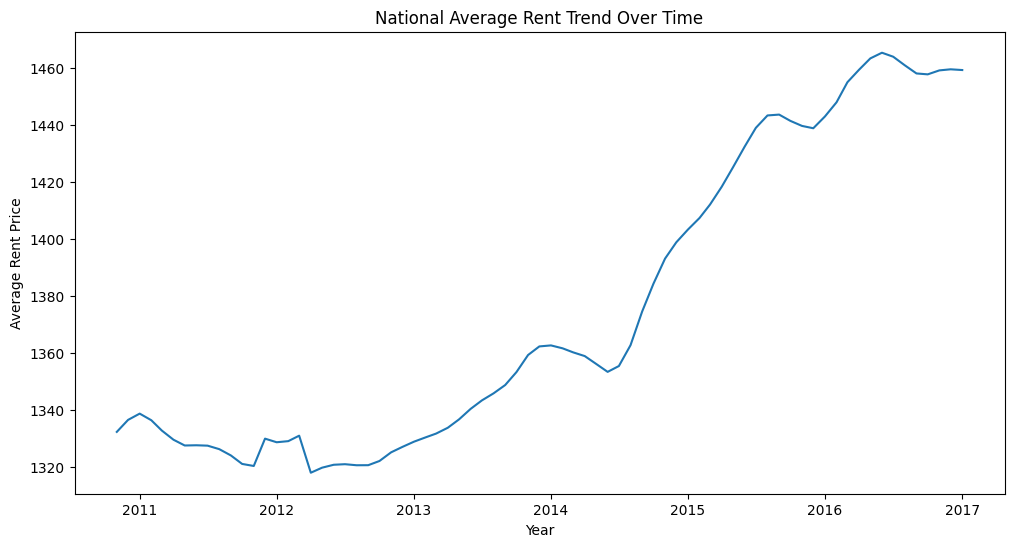

In [13]:
national_trend = (
    df
    .groupby('Date')['RentPrice']
    .mean()
)

plt.figure(figsize=(12,6))
plt.plot(national_trend)
plt.title('National Average Rent Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rent Price')
plt.show()

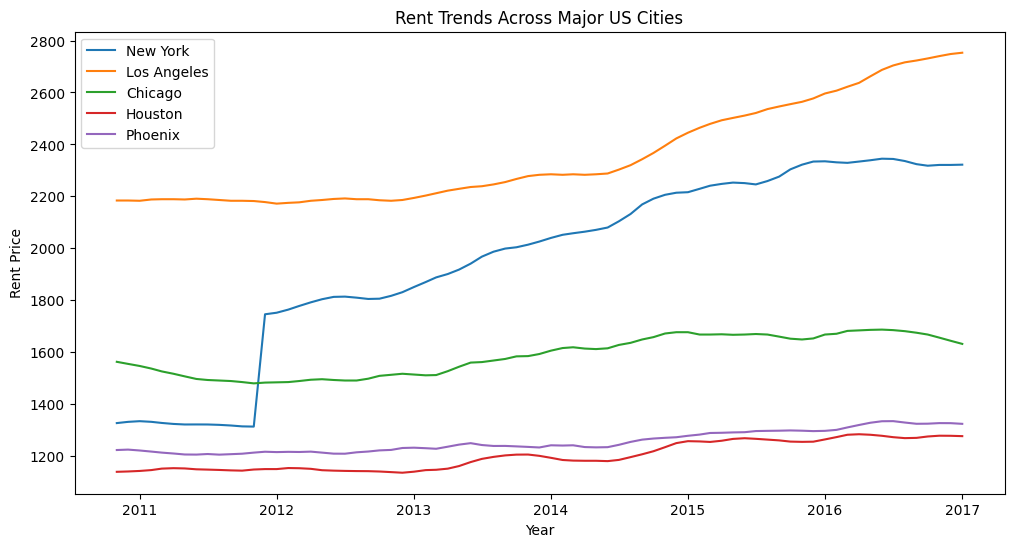

In [14]:
top_cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']

plt.figure(figsize=(12,6))
for city in top_cities:
    city_data = df[df['City'] == city]
    city_trend = city_data.groupby('Date')['RentPrice'].mean()
    plt.plot(city_trend, label=city)

plt.legend()
plt.title('Rent Trends Across Major US Cities')
plt.xlabel('Year')
plt.ylabel('Rent Price')
plt.show()

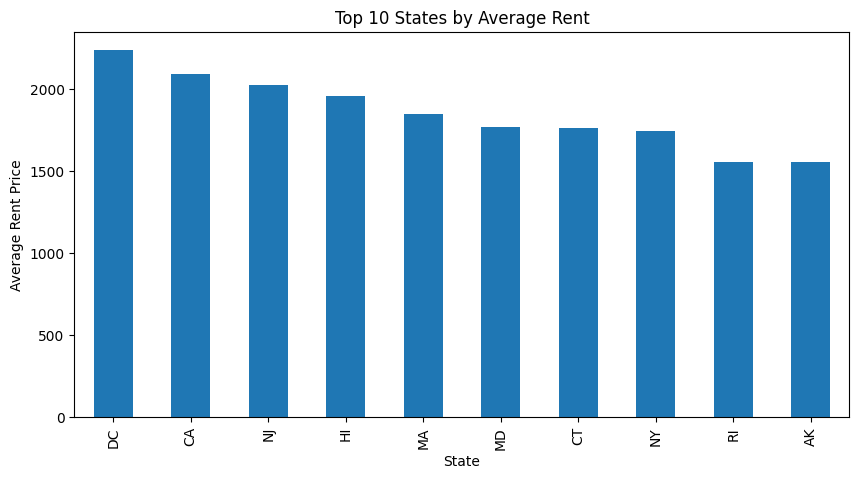

In [15]:
state_avg = (
    df
    .groupby('State')['RentPrice']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

state_avg.plot(kind='bar', figsize=(10,5), title='Top 10 States by Average Rent')
plt.ylabel('Average Rent Price')
plt.show()

# 
Features selected are - Date : clear, systematic change over time, City / Metro: Distinct rent trajectories, State: Geographic price clustering.